# Exploring the German-Korean Tatoeba dataset
[Github](https://github.com/Helsinki-NLP/Tatoeba-Challenge)

[Huggingface](https://huggingface.co/datasets/Helsinki-NLP/tatoeba_mt)

In [22]:
from tatoeba import preprocess, analysis
from rude_nmt import label_german, label_korean
import re
import os
import pandas as pd
from datasets import load_from_disk
import spacy

In [27]:
nlp = spacy.load("ko_core_news_lg", disable=["lemmatizer"])
print(spacy.explain("ADJ"))

adjective


In [ ]:
subtitle_data = preprocess.get_subtitle_dataset(force_renew=False)

In [2]:
subtitle_data = load_from_disk("data/unknown_labelled")

In [3]:
len(subtitle_data)
print(subtitle_data)


Dataset({
    features: ['id', 'source', 'target', 'de_upos_tags', 'de_pos_tags', 'de_ws_tokens', 'de_sent_ids', 'de_formality', 'ko_upos_tags', 'ko_pos_tags', 'ko_ws_tokens', 'ko_sent_ids', 'ko_formality'],
    num_rows: 996525
})


In [ ]:
long_data = subtitle_data.filter(lambda ex: len(ex["de_ws_tokens"]) > 100 or len(ex["ko_ws_tokens"]) > 100, num_proc=os.cpu_count())

In [ ]:
de_long = []
for sent in long_data["de_ws_tokens"]:
    de_long.append(len(sent))
print(list(reversed(sorted(de_long))))

In [ ]:
de_long = []
for sent in long_data["de_ws_tokens"]:
    de_long.append(len(sent))
print(list(reversed(sorted(de_long))))

In [ ]:
ko_long = []
for sent in long_data["ko_ws_tokens"]:
    ko_long.append(len(sent))
print(list(reversed(sorted(ko_long))))

In [ ]:
ko_long = []
for sent in long_data["ko_ws_tokens"]:
    ko_long.append(len(sent))
print(list(reversed(sorted(ko_long))))

In [ ]:
subtitle_data = subtitle_data.map(label_german.annotate_formality, load_from_cache_file=True, num_proc=8)
subtitle_data = subtitle_data.map(label_korean.annotate_formality, load_from_cache_file=True, num_proc=8)

In [ ]:
doc = label_german.get_pos_tags(subtitle_data[1:3])

In [ ]:
print(doc)

In [ ]:
subtitle_data = subtitle_data.map(label_german.get_pos_tags, load_from_cache_file=False, batched=True)

In [ ]:
subtitle_data.to_csv("./data/subtitle_data.csv")

In [ ]:
one_word_trg = analysis.get_one_word_sentences(subtitle_data)
print(one_word_trg)

In [4]:
dat = subtitle_data.to_pandas()

In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996525 entries, 0 to 996524
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            996525 non-null  object
 1   source        996525 non-null  object
 2   target        996525 non-null  object
 3   de_upos_tags  996525 non-null  object
 4   de_pos_tags   996525 non-null  object
 5   de_ws_tokens  996525 non-null  object
 6   de_sent_ids   996525 non-null  object
 7   de_formality  996525 non-null  object
 8   ko_upos_tags  996525 non-null  object
 9   ko_pos_tags   996525 non-null  object
 10  ko_ws_tokens  996525 non-null  object
 11  ko_sent_ids   996525 non-null  object
 12  ko_formality  996525 non-null  object
dtypes: object(13)
memory usage: 98.8+ MB


In [6]:
dat["de_formality"] = dat["de_formality"].astype('category')

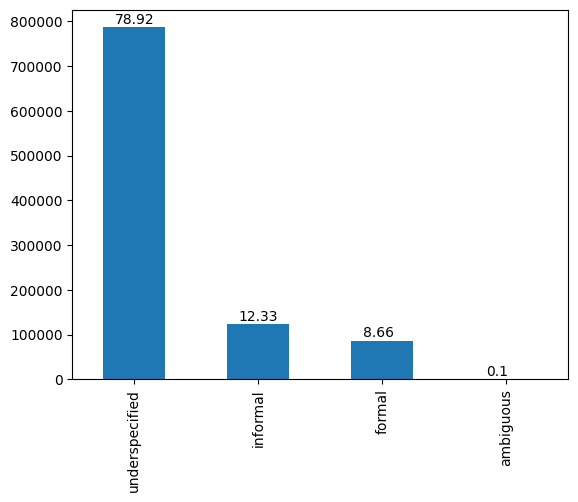

In [9]:
rows = len(dat.index)
ax = dat["de_formality"].value_counts().plot(kind="bar")
for p in ax.patches:
    b = p.get_bbox()
    ax.annotate(str(round(p.get_height()/rows * 100,2)), ((b.x0 + b.x1)/2 - 0.16, b.y1 + 8000))

fig = ax.get_figure()
fig.savefig("german.png", bbox_inches="tight")

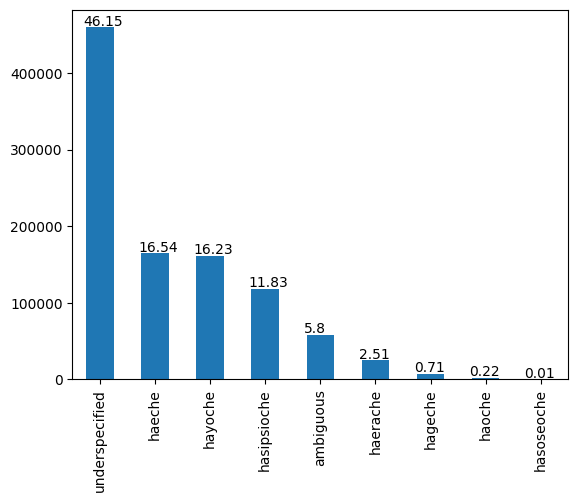

In [10]:
rows = len(dat.index)
ax = dat["ko_formality"].value_counts().plot(kind="bar")
for p in ax.patches:
    b = p.get_bbox()
    ax.annotate(str(round(p.get_height()/rows * 100,2)), ((b.x0 + b.x1)/2 - 0.3, b.y1 + 2500))

fig = ax.get_figure()
fig.savefig("korean.png", bbox_inches="tight")

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
print(len(dat.index))

In [7]:
dat["de_formality"].value_counts()

underspecified    786418
informal          122893
formal             86266
ambiguous            948
Name: de_formality, dtype: int64

In [8]:
dat["ko_formality"].value_counts()

underspecified    459876
haeche            164826
hayoche           161710
hasipsioche       117869
ambiguous          57829
haerache           25056
hageche             7085
haoche              2214
hasoseoche            60
Name: ko_formality, dtype: int64

In [ ]:
dat.head(10)

In [11]:
amb_dat = dat[dat["ko_formality"].str.match("underspecified")]

In [29]:
amb_dat[["ko_pos_tags", "ko_upos_tags","ko_ws_tokens","target"]].head(100).to_csv("ambiguity.csv")